## Figure 3
Distribution of parameter values from MCMC calibration.
Each row shows a different model (OV, SL, RU). Each column shows a different parameter (sigma_org, delta_min / A0, C0, m_sigma).
In the title of each subplot is the best fit and 95% CI for each parameter value.

In [3]:
import numpy as np
import os

from open_atmos_jupyter_utils import show_plot
from corner import corner
from matplotlib import pyplot

from PySDM.physics import si

from PySDM_examples.Singer_Ward.kappa_mcmc import param_transform

colors = {'Constant': 'k', 'CompressedFilmOvadnevaite': 'C0', 
    'SzyszkowskiLangmuir': 'C2', 'CompressedFilmRuehl': 'C1'}
names = {'Constant': 'CONST', 'CompressedFilmOvadnevaite': 'OV', 
    'SzyszkowskiLangmuir': 'SL', 'CompressedFilmRuehl': 'RU'}

def model_options(model):
    if model == "CompressedFilmOvadnevaite":
        labels = ["$\sigma_{org}$ [mN / m]", "$\delta_{min}$ [nm]"]
        scaling = [1, 1]
        plot_order = [0, 1]
    elif model == "SzyszkowskiLangmuir":
        labels = ["$A_0$ [m$^2$] $\\times 10^{20}$", "$C_0 \\times 10^{6}$", "$\sigma_{org}$ [mN / m]"]
        scaling = [1e20, 1e6, 1]
        plot_order = [1, 2, 0]
    elif model == "CompressedFilmRuehl":
        labels = [
            "$A_0$ [m$^2$] $\\times 10^{20}$",
            "$C_0 \\times 10^{6}$",
            "$\sigma_{org}$ [mN / m]",
            "$m_{\sigma}$ [J / m$^2$] $\\times 10^{-16}$",
        ]
        scaling = [1e20, 1e6, 1, 1e-16]
        plot_order = [1, 2, 0, 3]
    else:
        raise AssertionError()
    return labels, scaling, plot_order

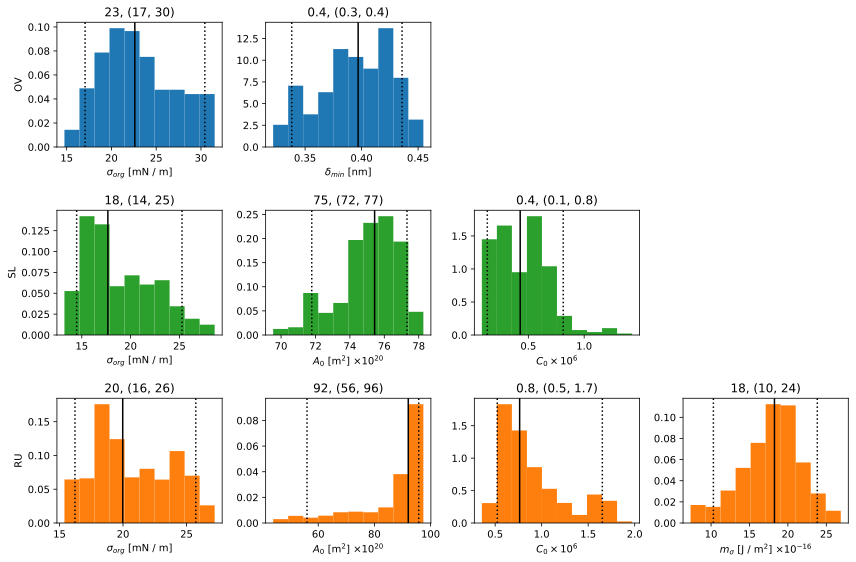

HTML(value="<a href='./fig3.pdf' target='_blank'>./fig3.pdf</a><br>")

In [4]:
fig, axes = pyplot.subplots(3, 4, figsize=(12,8))

for i, model in enumerate(("CompressedFilmOvadnevaite", "SzyszkowskiLangmuir", "CompressedFilmRuehl")):
    N = [1000, 1500, 5000][i]

    modelname = model.split("CompressedFilm")[-1]
    aerosolname = "BetaCaryophylleneDark"
    outputfile = "mcmc_output/" + aerosolname + "_" + modelname + "_chain" + str(N) + ".csv"
    param_chain = np.loadtxt(outputfile, delimiter=",").T

    data = param_transform(param_chain, model).T
    data = data[500:, :]

    labels, scaling, plot_order = model_options(model)

    axes[i,0].set_ylabel(names[model])

    for j in range(data.shape[1]):
        dj = data[:, j] * scaling[j]
        ax = axes[i, plot_order[j]]

        ax.hist(dj, color=colors[model], density=True)
        ax.set_xlabel(labels[j])
        if j == 1:
            ax.set_title(f"{np.quantile(dj, 0.5):.1f}, ({np.quantile(dj, 0.05):.1f}, {np.quantile(dj, 0.95):.1f})")
        else:
            ax.set_title(f"{np.quantile(dj, 0.5):.0f}, ({np.quantile(dj, 0.05):.0f}, {np.quantile(dj, 0.95):.0f})")
        
        ax.axvline(np.quantile(dj, 0.5), ls="-", color="k")
        ax.axvline(np.quantile(dj, 0.05), ls=":", color="k")
        ax.axvline(np.quantile(dj, 0.95), ls=":", color="k")

axes[0, 2].remove()
axes[0, 3].remove()
axes[1, 3].remove()

pyplot.tight_layout()
show_plot("fig3.pdf")